<a href="https://colab.research.google.com/github/Hkachhadiya/Task_1_ML/blob/main/Sentiment_Analysis_Financial_News_Headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix

## 1. Download the dataset [1 point]

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"
df = pd.read_csv(url, encoding='latin1')


In [2]:
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


## 2. Load the dataset [1 point]

In [3]:
df = pd.read_csv(url, encoding='latin1', header=None, names=['sentiment', 'headline'])


## 3. Explore the dataset [10 points]

In [4]:
print("Exploratory Data Analysis:")
print(df.head())
print(df.info())
print(df['sentiment'].value_counts())


Exploratory Data Analysis:
  sentiment                                           headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   headline   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None
neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64


## 4. Clean the data [5 points]

In [5]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['headline_clean'] = df['headline'].apply(lambda x: clean_text(x))

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

Classification Report:
              precision    recall  f1-score   support

    negative       0.52      0.65      0.58       110
     neutral       0.78      0.84      0.81       571
    positive       0.63      0.47      0.54       289

    accuracy                           0.71       970
   macro avg       0.64      0.66      0.64       970
weighted avg       0.71      0.71      0.70       970

Naive Bayes Classifier with BoW:
              precision    recall  f1-score   support

    negative       0.52      0.65      0.58       110
     neutral       0.78      0.84      0.81       571
    positive       0.63      0.47      0.54       289

    accuracy                           0.71       970
   macro avg       0.64      0.66      0.64       970
weighted avg       0.71      0.71      0.70       970

Logistic Regression Classifier with BoW:
              precision    recall  f1-score   support

    negative       0.60      0.68      0.64       110
     neutral       0.79      0.7

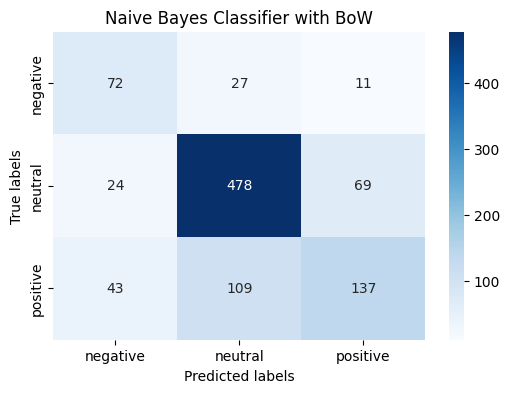

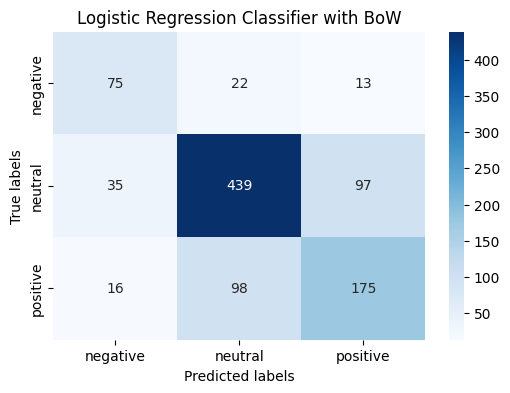

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['sentiment'], test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train_encoded)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

X_test_vectorized = vectorizer.transform(X_test)

y_pred = nb_classifier.predict(X_test_vectorized)

y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))


# Additional Steps:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_bow, y_train_encoded)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

nb_classifier_bow = MultinomialNB()
nb_classifier_bow.fit(X_train_resampled, y_train_resampled)
y_pred_nb_bow = nb_classifier_bow.predict(X_test_bow)

print("Naive Bayes Classifier with BoW:")
print(classification_report(y_test, label_encoder.inverse_transform(y_pred_nb_bow)))

lr_classifier_bow = LogisticRegression(max_iter=1000)
lr_classifier_bow.fit(X_train_resampled, y_train_resampled)
y_pred_lr_bow = lr_classifier_bow.predict(X_test_bow)

print("Logistic Regression Classifier with BoW:")
print(classification_report(y_test, label_encoder.inverse_transform(y_pred_lr_bow)))


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, label_encoder.inverse_transform(y_pred_nb_bow), "Naive Bayes Classifier with BoW")
plot_confusion_matrix(y_test, label_encoder.inverse_transform(y_pred_lr_bow), "Logistic Regression Classifier with BoW")


## 6. BoW model [15 points]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['headline_clean'])

## 7. Tf-idf model [15 points]

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['headline_clean'])

## 8. Split train test data [3 points]

In [9]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, df['sentiment'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)


## 9. Classification Algorithm [10 points]
- Train
- Predict

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)
y_pred_nb_bow = nb_classifier.predict(X_test_bow)

print("Naive Bayes Classifier with BoW:")
print(classification_report(y_test, y_pred_nb_bow))

Naive Bayes Classifier with BoW:
              precision    recall  f1-score   support

    negative       0.76      0.53      0.62       110
     neutral       0.79      0.87      0.82       571
    positive       0.68      0.62      0.65       289

    accuracy                           0.75       970
   macro avg       0.74      0.67      0.70       970
weighted avg       0.75      0.75      0.75       970



## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [11]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_classifier.predict(X_test_tfidf)

print("Logistic Regression Classifier with Tf-idf:")
print(classification_report(y_test, y_pred_lr_tfidf))

Logistic Regression Classifier with Tf-idf:
              precision    recall  f1-score   support

    negative       0.92      0.50      0.65       110
     neutral       0.74      0.96      0.83       571
    positive       0.82      0.48      0.61       289

    accuracy                           0.76       970
   macro avg       0.82      0.65      0.70       970
weighted avg       0.78      0.76      0.75       970



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

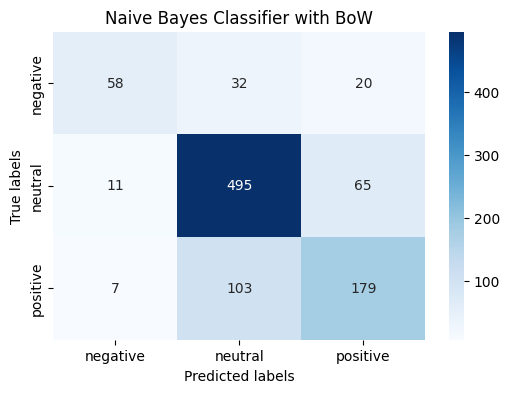

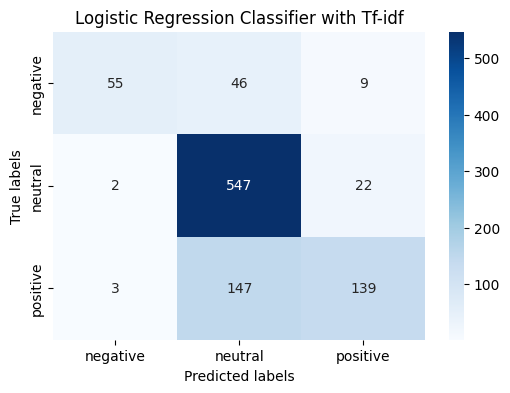

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb_bow, "Naive Bayes Classifier with BoW")
plot_confusion_matrix(y_test, y_pred_lr_tfidf, "Logistic Regression Classifier with Tf-idf")